# Averaged Artifact Substraction with EEG Data
## First step prepare Jupyter Notebook

In [1]:
import os
from FACET.Facet import Facet
os.getcwd()
os.chdir(os.path.dirname(os.path.abspath("__file__")))

eegDataSet = "NiazyFMRI.edf"
#eegDataSet = "C:\\Users\\janik\\Downloads\\FMRIB_Data.set\\eegNiazy.edf"

f = Facet()


## Second Step import EEG Data

In [2]:
f.import_EEG(eegDataSet, rel_trig_pos=-0.01, bads=['EMG', 'ECG'])
f.find_triggers(r'\b1\b')
eeg = f.get_EEG()
#print triggers
print(eeg["triggers"])
event_id={'trigger':1}
f.export_as_bids(event_id)
f.import_from_bids(rel_trig_pos=-0.01, bads=['EMG', 'ECG'])
eeg = f.get_EEG()
#print channels
print(eeg["raw"].ch_names)

f.plot_EEG(title="after import")

Importing EEG with:
Channels ['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'T3', 'C3', 'Cz', 'C4', 'T4', 'T5', 'P3', 'Pz', 'P4', 'T6', 'O1', 'O2', 'AF4', 'AF3', 'FC2', 'FC1', 'CP1', 'CP2', 'PO3', 'PO4', 'FC6', 'FC5', 'CP5', 'EMG', 'ECG', 'Status']
Time Start: 0.0s
Time End: 162.99951171875s
Number of Samples: 333824
Sampling Frequency: 2048.0Hz
NiazyFMRI.edf
Stim-Kanäle gefunden: ['Status']
Channels after find trigger: ['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'T3', 'C3', 'Cz', 'C4', 'T4', 'T5', 'P3', 'Pz', 'P4', 'T6', 'O1', 'O2', 'AF4', 'AF3', 'FC2', 'FC1', 'CP1', 'CP2', 'PO3', 'PO4', 'FC6', 'FC5', 'CP5', 'EMG', 'ECG', 'Status']
finding triggers
[58886, 59178, 59470, 59762, 60054, 60346, 60638, 60931, 61223, 61515, 61807, 62099, 62391, 62683, 62975, 63268, 63560, 63852, 64144, 64436, 64728, 65030, 65323, 65615, 65907, 66199, 66491, 66783, 67075, 67367, 67659, 67952, 68244, 68536, 68828, 69120, 69412, 69704, 69996, 70288, 70581, 70873, 71175, 71467, 71759, 72051, 72344, 72636, 72928,

## Third Step Preprocessing

In [3]:
f.pre_processing()


Applying highpassfilter
Upsampling Data


## Fourth Step find triggers

In [4]:

f.find_triggers(r'\btrigger\b', idx=0) # Using Niazys data
eeg = f.get_EEG()
#print triggers
print(eeg["triggers"])
#f.cut()

#f.find_triggers(r'.*TR.*') # Using Fischmeisters data

No Stim-Channels found.

{'trigger': 1}
Channels after find trigger: ['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'T3', 'C3', 'Cz', 'C4', 'T4', 'T5', 'P3', 'Pz', 'P4', 'T6', 'O1', 'O2', 'AF4', 'AF3', 'FC2', 'FC1', 'CP1', 'CP2', 'PO3', 'PO4', 'FC6', 'FC5', 'CP5', 'EMG', 'ECG']
finding triggers
[588860, 591780, 594700, 597620, 600540, 603460, 606380, 609310, 612230, 615150, 618070, 620990, 623910, 626830, 629750, 632680, 635600, 638520, 641440, 644360, 647280, 650300, 653230, 656150, 659070, 661990, 664910, 667830, 670750, 673670, 676590, 679520, 682440, 685360, 688280, 691200, 694120, 697040, 699960, 702880, 705810, 708730, 711750, 714670, 717590, 720510, 723440, 726360, 729280, 732200, 735120, 738040, 740960, 743880, 746800, 749730, 752650, 755570, 758490, 761410, 764330, 767250, 770170, 773200, 776120, 779040, 781960, 784880, 787800, 790720, 793650, 796570, 799490, 802410, 805330, 808250, 811170, 814090, 817010, 819940, 822860, 825780, 828700, 831620, 834640, 837560, 840490, 843410, 8

## Fourth step apply AAS

In [5]:
f.apply_MNE_AAS(method="matrix")

Averaging Channel Fp1 Epochs: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 

## Fifth step Remove Artifacts

In [6]:
f.remove_artifacts( )
eeg = f.get_EEG()
#print triggers
print(eeg["triggers"])



['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'T3', 'C3', 'Cz', 'C4', 'T4', 'T5', 'P3', 'Pz', 'P4', 'T6', 'O1', 'O2', 'AF4', 'AF3', 'FC2', 'FC1', 'CP1', 'CP2', 'PO3', 'PO4', 'FC6', 'FC5', 'CP5']
[588860, 591780, 594700, 597620, 600540, 603460, 606380, 609310, 612230, 615150, 618070, 620990, 623910, 626830, 629750, 632680, 635600, 638520, 641440, 644360, 647280, 650300, 653230, 656150, 659070, 661990, 664910, 667830, 670750, 673670, 676590, 679520, 682440, 685360, 688280, 691200, 694120, 697040, 699960, 702880, 705810, 708730, 711750, 714670, 717590, 720510, 723440, 726360, 729280, 732200, 735120, 738040, 740960, 743880, 746800, 749730, 752650, 755570, 758490, 761410, 764330, 767250, 770170, 773200, 776120, 779040, 781960, 784880, 787800, 790720, 793650, 796570, 799490, 802410, 805330, 808250, 811170, 814090, 817010, 819940, 822860, 825780, 828700, 831620, 834640, 837560, 840490, 843410, 846330, 849250, 852170, 855090, 858010, 860930, 863850, 866780, 869700, 872620, 875540, 878460, 88138

## Sixth step Post-Processing

In [7]:
f.downsample()
f.plot_EEG( title="after downsampling")
f.lowpass(h_freq=40)

Downsampling Data
Applying lowpassfilter


## Seventh display the processed eeg data

In [8]:
f.plot_EEG(title="after lowpass")
f.export_EEG("NiazyFMRI_pyFacet_cleaned.edf")

## Eighth Evaluate Results

No Stim-Channels found.

{'trigger': 1}
Channels after find trigger: ['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'T3', 'C3', 'Cz', 'C4', 'T4', 'T5', 'P3', 'Pz', 'P4', 'T6', 'O1', 'O2', 'AF4', 'AF3', 'FC2', 'FC1', 'CP1', 'CP2', 'PO3', 'PO4', 'FC6', 'FC5', 'CP5', 'EMG', 'ECG']
finding triggers
['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'T3', 'C3', 'Cz', 'C4', 'T4', 'T5', 'P3', 'Pz', 'P4', 'T6', 'O1', 'O2', 'AF4', 'AF3', 'FC2', 'FC1', 'CP1', 'CP2', 'PO3', 'PO4', 'FC6', 'FC5', 'CP5', 'EMG', 'ECG']
Importing EEG with:
Channels ['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'T3', 'C3', 'Cz', 'C4', 'T4', 'T5', 'P3', 'Pz', 'P4', 'T6', 'O1', 'O2', 'AF4', 'AF3', 'FC2', 'FC1', 'CP1', 'CP2', 'PO3', 'PO4', 'FC6', 'FC5', 'CP5', 'EMG', 'ECG']
Time Start: 0.0s
Time End: 162.99951171875s
Number of Samples: 333824
Sampling Frequency: 2048.0Hz
NiazyFMRI_matlab_cleaned.edf
Applying lowpassfilter
['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'T3', 'C3', 'Cz', 'C4', 'T4', 'T5', 'P3', 'Pz', 'P4', 'T6', 'O1',

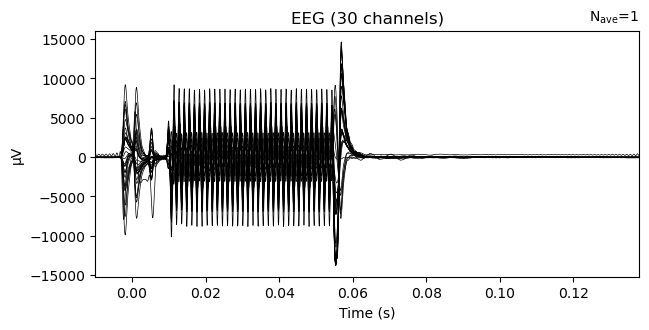

['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'T3', 'C3', 'Cz', 'C4', 'T4', 'T5', 'P3', 'Pz', 'P4', 'T6', 'O1', 'O2', 'AF4', 'AF3', 'FC2', 'FC1', 'CP1', 'CP2', 'PO3', 'PO4', 'FC6', 'FC5', 'CP5']
Downsampling Data
Applying lowpassfilter
Stim-Kanäle gefunden: ['Status']
Channels after find trigger: ['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'T3', 'C3', 'Cz', 'C4', 'T4', 'T5', 'P3', 'Pz', 'P4', 'T6', 'O1', 'O2', 'AF4', 'AF3', 'FC2', 'FC1', 'CP1', 'CP2', 'PO3', 'PO4', 'FC6', 'FC5', 'CP5', 'EMG', 'ECG', 'Status']
finding triggers
['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'T3', 'C3', 'Cz', 'C4', 'T4', 'T5', 'P3', 'Pz', 'P4', 'T6', 'O1', 'O2', 'AF4', 'AF3', 'FC2', 'FC1', 'CP1', 'CP2', 'PO3', 'PO4', 'FC6', 'FC5', 'CP5', 'EMG', 'ECG', 'Status']


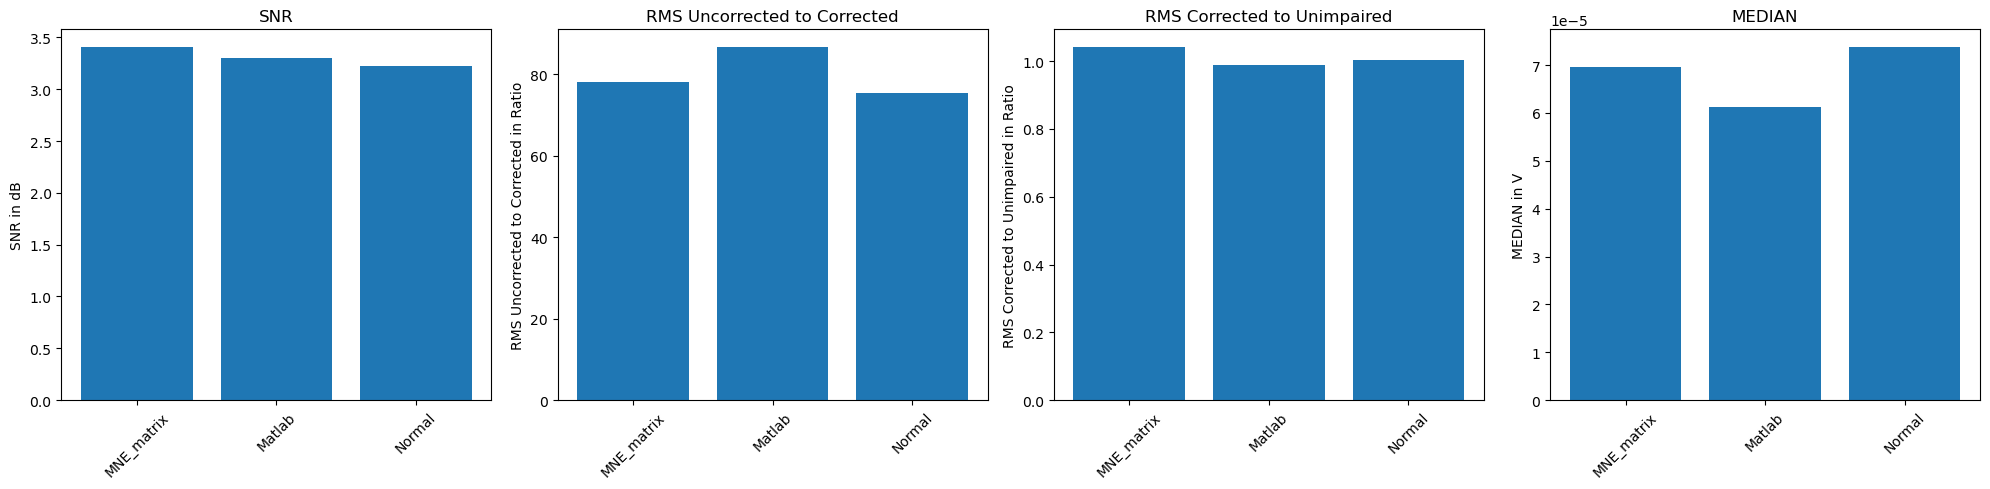

[{'Measure': 'SNR', 'Values': [3.406979903322095, 3.3043945911511123, 3.2238921883293985], 'Unit': 'dB'}, {'Measure': 'RMS Uncorrected to Corrected', 'Values': [78.00844099458438, 86.66276297095078, 75.44555191220651], 'Unit': 'Ratio'}, {'Measure': 'RMS Corrected to Unimpaired', 'Values': [1.0417176415718497, 0.9890661574191066, 1.0044482815692115], 'Unit': 'Ratio'}, {'Measure': 'MEDIAN', 'Values': [6.965088197770917e-05, 6.126168764046982e-05, 7.378675554952216e-05], 'Unit': 'V'}]
Exporting Channels: ['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'T3', 'C3', 'Cz', 'C4', 'T4', 'T5', 'P3', 'Pz', 'P4', 'T6', 'O1', 'O2', 'AF4', 'AF3', 'FC2', 'FC1', 'CP1', 'CP2', 'PO3', 'PO4', 'FC6', 'FC5', 'CP5', 'EMG', 'ECG', 'Status']


In [9]:
f.find_triggers(r'\btrigger\b') # Using Niazys data
eeg_python = f.get_eeg()
f.add_to_evaluate(eeg_python, name="MNE_matrix")


#matlab version
eeg_matlab = f.import_EEG('NiazyFMRI_matlab_cleaned.edf',rel_trig_pos=-0.01, bads=['EMG', 'ECG']) # EDF File may not save events # maybe use bids instead
eeg_matlab["raw_orig"]=eeg_python["raw_orig"]
eeg_matlab["tmin"]=eeg_python["tmin"]
eeg_matlab["tmax"]=eeg_python["tmax"]
eeg_matlab["triggers"]=eeg_python["triggers"]
f.lowpass(h_freq=40)
f.add_to_evaluate(f.get_eeg(), start_time=eeg_python["time_triggers_start"], end_time=eeg_python["time_triggers_end"], name="Matlab")

#normal version
f.import_EEG(eegDataSet, rel_trig_pos=-0.01, bads=['EMG', 'ECG'])
f.pre_processing()
f.find_triggers(r'\b1\b')
f.apply_MNE_AAS(method="normal")
f.remove_artifacts()
f.downsample()
f.lowpass(h_freq=40)
f.find_triggers(r'\b1\b')
f.add_to_evaluate(f.get_eeg(), name="Normal")
f.export_EEG("NiazyFMRI_pyFacet_cleaned_new.edf")



results = f.evaluate(plot=True,measures=["SNR", "RMS", "RMS2", "MEDIAN"])
print(results)

f.export_as_bids(event_id=event_id)

